In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filmes = pd.read_csv('ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
filmes['generos'].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# por padrão, o sum() soma as colunas
filmes['generos'].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [9]:
# para pegar quantos generos os filmes possuem...
filmes['generos'].str.get_dummies('|').sum(axis=1).value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

In [15]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [16]:
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [17]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [19]:
#ordenando pelo índice
filmes['generos'].str.get_dummies('|').sum().sort_index()


(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

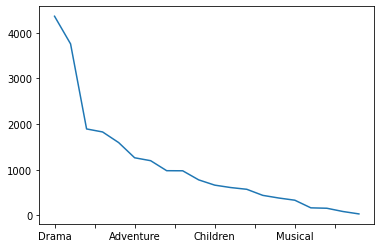

In [23]:
# plotando o grafico da quantidade de filmes por genero
# usar grafico de linhas não faz sentida nesse caso
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot()

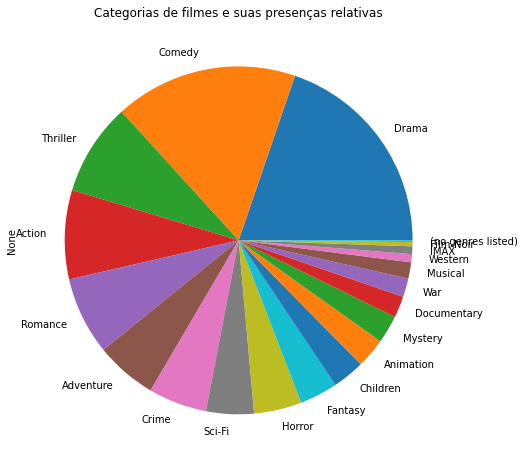

In [34]:
# "se o grafico tem nome de comida, não deve ser utilizado"
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie',
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8)
)
plt.show()

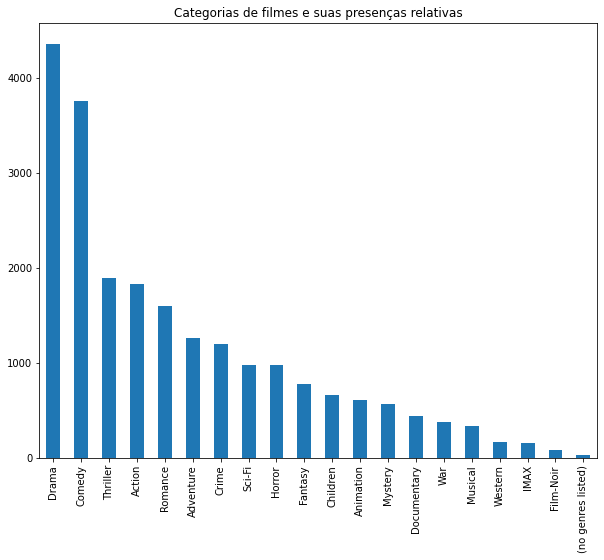

In [33]:

filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar',
    title='Categorias de filmes por categoria',
    figsize=(10,8)
)
plt.show()

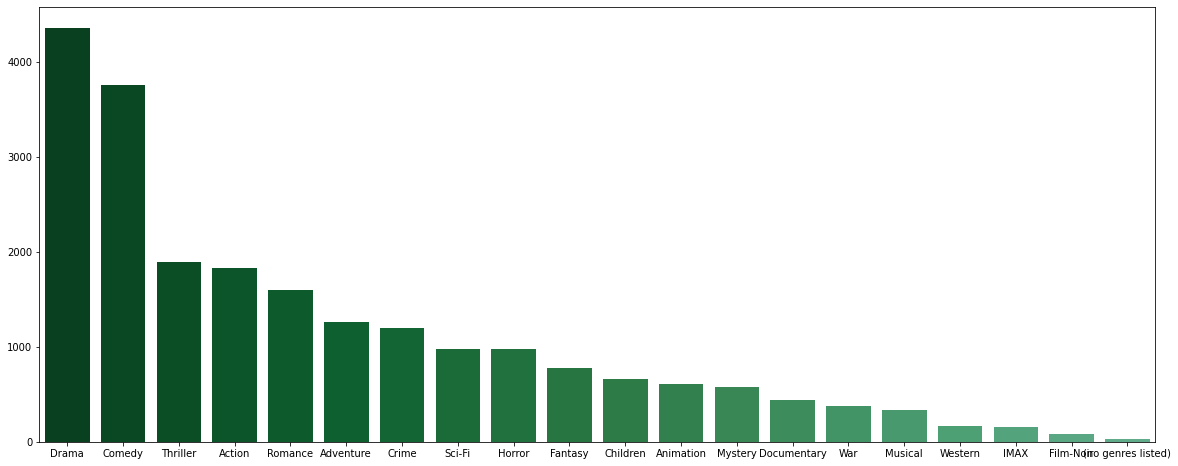

In [50]:

filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
           y=filmes_por_genero.values,
           palette=sns.color_palette("BuGn_r",n_colors=len(filmes_por_genero)+25))

plt.show()

# len(filmes_por_genero)+25) #gambiarra para que a cor final não seja clara demais

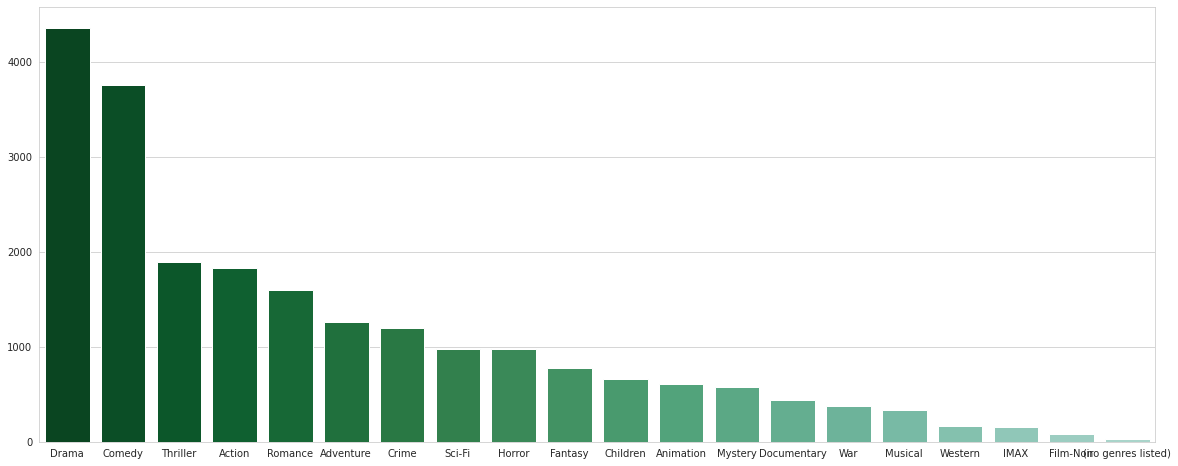

In [52]:

sns.set_style('whitegrid') #configuração global, para adicionar o grid nas plotagens


plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
           y=filmes_por_genero.values,
           palette=sns.color_palette("BuGn_r",n_colors=len(filmes_por_genero)+10))

plt.show()

3.9209302325581397


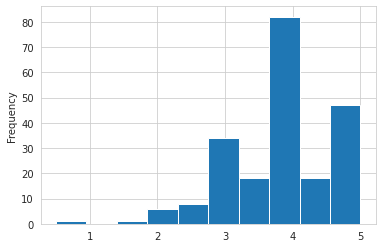

In [56]:
#extraindo a média das avaliações do filme 1

avaliacoes = pd.read_csv('ml-latest-small/ratings.csv')
avaliacoes.columns = ['usuarioId', 'filmeId', 'notas', 'momento']

notas_dos_filmes_1 = avaliacoes.query('filmeId==1')['notas']
print(notas_dos_filmes_1.mean())
notas_dos_filmes_1.plot(kind='hist')

3.4318181818181817


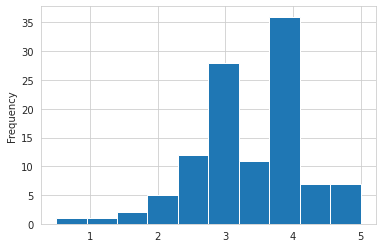

In [57]:
#extraindo a média das avaliações do filme 2
 

notas_dos_filmes_2 = avaliacoes.query('filmeId==2')['notas']
print(notas_dos_filmes_2.mean())
notas_dos_filmes_2.plot(kind='hist')

In [58]:
notas_dos_filmes_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: notas, dtype: float64

In [60]:
notas_medias_por_filme = avaliacoes.groupby('filmeId').mean()

In [65]:
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId' )
filmes_com_media.sort_values('notas', ascending=False)[2450:2500]

,filmeId,titulo,generos,usuarioId,notas,momento
745,973,Meet John Doe (1941),Comedy|Drama,456.400000,3.900000,1.070596e+09
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,312.000000,3.900000,1.295000e+09
101,116,Anne Frank Remembered (1995),Documentary,454.400000,3.900000,9.174821e+08
5719,27846,"Corporation, The (2003)",Documentary,333.600000,3.900000,1.206775e+09
802,1050,Looking for Richard (1996),Documentary|Drama,385.800000,3.900000,1.099320e+09
3983,5617,Secretary (2002),Comedy|Drama|Romance,314.360000,3.900000,1.250030e+09
1323,1785,King of New York (1990),Crime|Thriller,247.200000,3.900000,1.041850e+09
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,347.400000,3.900000,1.433349e+09
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,376.200000,3.900000,1.171566e+09
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,359.800000,3.900000,1.235019e+09


In [71]:
def plot_filme(n):
    notas_dos_filmes = avaliacoes.query(f'filmeId=={n}')['notas'] 
    notas_dos_filmes.plot(kind='hist')
    return notas_dos_filmes.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: notas, dtype: float64

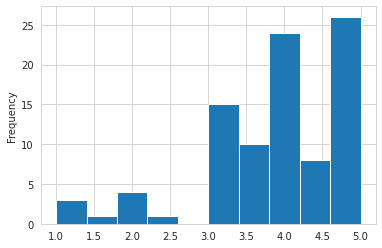

In [72]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: notas, dtype: float64

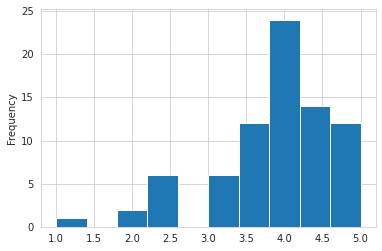

In [73]:
plot_filme(46578)

In [108]:
def plot_boxplot_filme(n):
    notas_dos_filmes = avaliacoes.query(f'filmeId=={n}')['notas'] 
    notas_dos_filmes.plot(kind='hist')
    plt.show()
    notas_dos_filmes.plot.box()
    plt.show()
    return notas_dos_filmes.describe()

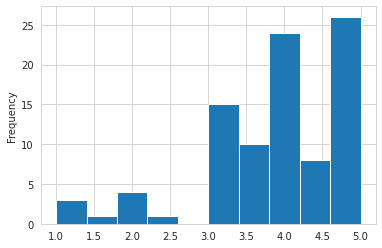

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: notas, dtype: float64

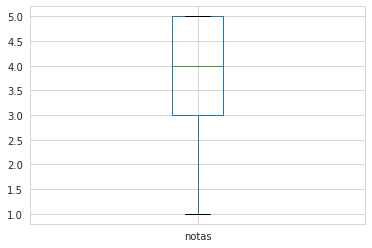

In [81]:
plot_boxplot_filme(919)

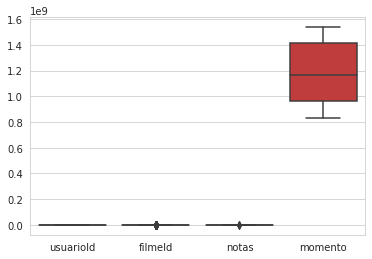

In [113]:
sns.boxplot(data=avaliacoes.query('filmeId in [1,2,919,46578]'))

Desafio 1
- Rotacionar os thicks (os nomes dos generos)

Desafio 2:
- Comparar outros filmes com notas proximas, e achar distribuições bem diferentes

Desafio 3:
- Criar o boxplot dos 10 filmes com mais votos (não e com a maior méia, é com mais votos)


Desafio 2:
- Comparar outros filmes com notas proximas, e achar distribuições bem diferentes

In [110]:
def plot_boxplot_3_filmes(n):
    df = pd.DataFrame()
    
    nota_a =  avaliacoes.query(f'filmeId=={n-1}')['notas']
    nota_b =  avaliacoes.query(f'filmeId=={n}')['notas']
    nota_c =  avaliacoes.query(f'filmeId=={n+1}')['notas']
    
    df = pd.concat([nota_a, nota_b, nota_c], axis=1)
    
    df.boxplot()
    return(df.describe)

<bound method NDFrame.describe of        notas  notas  notas
349      4.0    NaN    NaN
1689     3.5    NaN    NaN
3002     4.0    NaN    NaN
4259     2.0    NaN    NaN
7128     4.0    NaN    NaN
...      ...    ...    ...
96283    4.0    NaN    NaN
96284    NaN    4.0    NaN
97173    NaN    3.0    NaN
97490    4.0    NaN    NaN
97491    NaN    4.0    NaN

[66 rows x 3 columns]>

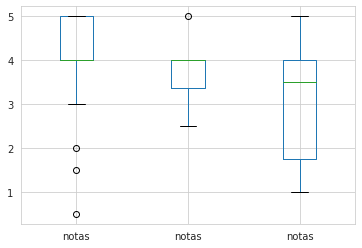

In [112]:
plot_boxplot_3_filmes(900)